### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [3]:
!pip3 install -U tensorflow --quiet

     |████████████████████████████████| 86.3MB 130kB/s 
     |████████████████████████████████| 3.8MB 51.3MB/s 
     |████████████████████████████████| 450kB 47.5MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.


In [0]:
import tensorflow as tf
#tf.set_random_seed(42)

In [5]:
tf.__version__

'2.0.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [44]:
print(testY[0:5])

[9 2 1 1 6]


In [45]:
display_labels = testY[0:10]
display_labels

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [47]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [48]:
trainX[0].shape

(28, 28)

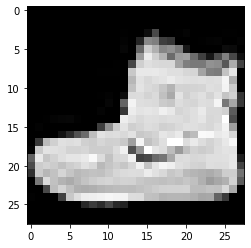

In [49]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(trainX[0],cmap='gray')

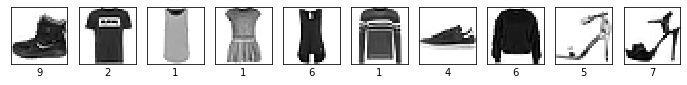

In [53]:
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(display_labels[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [17]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 68us/sample - loss: 6281.8595 - accuracy: 0.7394 - val_loss: 6291.9395 - val_accuracy: 0.7149
Epoch 2/30
60000/60000 [==============================] - 4s 59us/sample - loss: 4826.7328 - accuracy: 0.7792 - val_loss: 7750.8406 - val_accuracy: 0.6565
Epoch 3/30
60000/60000 [==============================] - 3s 57us/sample - loss: 4502.9668 - accuracy: 0.7861 - val_loss: 7535.1862 - val_accuracy: 0.7012
Epoch 4/30
60000/60000 [==============================] - 3s 58us/sample - loss: 4659.6241 - accuracy: 0.7868 - val_loss: 4881.4646 - val_accuracy: 0.7653
Epoch 5/30
60000/60000 [==============================] - 4s 59us/sample - loss: 4368.4506 - accuracy: 0.7951 - val_loss: 4604.5068 - val_accuracy: 0.7727
Epoch 6/30
60000/60000 [==============================] - 3s 58us/sample - loss: 4469.6525 - accuracy: 0.7927 - val_loss: 3015.7093 - val_accuracy: 0.8189
Epoch 7/30
60000/600

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [21]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5590 - accuracy: 0.8076 - val_loss: 0.5039 - val_accuracy: 0.8316
Epoch 2/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4829 - accuracy: 0.8329 - val_loss: 0.4961 - val_accuracy: 0.8284
Epoch 3/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4688 - accuracy: 0.8385 - val_loss: 0.4853 - val_accuracy: 0.8387
Epoch 4/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4618 - accuracy: 0.8396 - val_loss: 0.5041 - val_accuracy: 0.8304
Epoch 5/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4540 - accuracy: 0.8431 - val_loss: 0.4797 - val_accuracy: 0.8404
Epoch 6/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4529 - accuracy: 0.8433 - val_loss: 0.5038 - val_accuracy: 0.8307
Epoch 7/30
60000/60000 [==============================] 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.9480 - accuracy: 0.6738 - val_loss: 0.6981 - val_accuracy: 0.7653
Epoch 2/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.6486 - accuracy: 0.7760 - val_loss: 0.6124 - val_accuracy: 0.7918
Epoch 3/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5926 - accuracy: 0.7950 - val_loss: 0.5873 - val_accuracy: 0.8035
Epoch 4/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5611 - accuracy: 0.8064 - val_loss: 0.5773 - val_accuracy: 0.8092
Epoch 5/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.5431 - accuracy: 0.8107 - val_loss: 0.5421 - val_accuracy: 0.8165
Epoch 6/30
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5303 - accuracy: 0.8170 - val_loss: 0.5369 - val_accuracy: 0.8193
Epoch 7/30
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Review model

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [56]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 65us/sample - loss: 1.5962 - accuracy: 0.6105 - val_loss: 1.0645 - val_accuracy: 0.7191
Epoch 2/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.8708 - accuracy: 0.7382 - val_loss: 0.7491 - val_accuracy: 0.7567
Epoch 3/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6823 - accuracy: 0.7658 - val_loss: 0.6408 - val_accuracy: 0.7728
Epoch 4/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6019 - accuracy: 0.7861 - val_loss: 0.5835 - val_accuracy: 0.7918
Epoch 5/30
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5528 - accuracy: 0.8031 - val_loss: 0.5475 - val_accuracy: 0.8045
Epoch 6/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5181 - accuracy: 0.8160 - val_loss: 0.5188 - val_accuracy: 0.8131
Epoch 7/30
60000/60000 [==============================] 